In [1]:
import matplotlib.pyplot as plt
import cv2
import glob
import os
import numpy as np

%matplotlib inline

In [2]:
def get_filename(fulllocation):
    i=1
    while True:
        if fulllocation[-i] is not "/":
            i += 1
        else:
            name=fulllocation[-(i-1):]
            break
    return name

def explore_dir(dir,count):
    if count==0:
        global n_dir, n_file, filenames, filelocations
        n_dir=n_file=0
        filenames=filelocations=np.array([])
    for obj in glob.glob(dir+"/*"):
        if os.path.isdir(obj):
            n_dir +=1
            explore_dir(obj,count+1)
        elif os.path.isfile(obj):
            n_file += 1
            loc=np.array([obj])
            name=np.array([get_filename(obj)])
            filelocations=np.concatenate((filelocations, loc), axis=0)
            filenames=np.concatenate((filenames, name), axis=0)
    return np.array([filenames,filelocations])

In [3]:
def markJoints(img, joints):  
    numJoints, t = joints.shape
    circSize=10
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(numJoints):
        x = int(joints[i,0])
        y = int(joints[i,1])
    
        cv2.circle(img, (x, y), 4, (255, 0, 0), thickness=-1)
        cv2.putText(img, str(i+1), (x,y), font, 0.5, (100,100,100), 1, cv2.LINE_AA)

In [4]:
dataset=explore_dir("/Users/macbook/src/GIT/My_Tools/HumanPose/MET Data Set/",0)

In [5]:
joints=open("/Users/macbook/Desktop/joints/jsw.txt","r")

In [6]:
coors=np.zeros([20,14,2],dtype=int)
joints=open("/Users/macbook/Desktop/joints/jsw.txt","r")
for i in range(20):
    for j in range(14):
        XY=joints.readline()
        k=0
        while True:
            if XY[k]==",": break
            else: k+=1
        coors[i][j][:]=int(XY[1:k]),int(XY[k+1:-2])

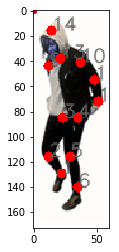

In [7]:
indices=[0,1]
img=cv2.imread(dataset[1][indices[0]])
markJoints(img,coors[indices[1]])
plt.imshow(img)

In [8]:
cv2.imwrite("/Users/macbook/Desktop/joints/pic/walking/"+dataset[0][indices[0]],img)

True

In [ ]:
2,1